Use pretrained model (Vgg16, ResNet50) for any dataset. compare accuracy and performance metrics.

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step


In [3]:
def build_model(base_model, input_shape=(32, 32, 3), num_classes=10):
    base = base_model(include_top=False, weights='imagenet', input_shape=input_shape)
    base.trainable = False  # Freeze the base model
    
    # Add custom layers on top
    inputs = Input(shape=input_shape)
    x = base(inputs, training=False)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
vgg16_model = build_model(VGG16)
vgg16_history = vgg16_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
vgg16_metrics = vgg16_model.evaluate(X_test, y_test)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 318s 254ms/step - accuracy: 0.4481 - loss: 1.5800 - val_accuracy: 0.5608 - val_loss: 1.2502
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 184s 147ms/step - accuracy: 0.5744 - loss: 1.2203 - val_accuracy: 0.5830 - val_loss: 1.1973
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 242s 194ms/step - accuracy: 0.6001 - loss: 1.1460 - val_accuracy: 0.5921 - val_loss: 1.1707
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 250s 200ms/step - accuracy: 0.6084 - loss: 1.1138 - val_accuracy: 0.5927 - val_loss: 1.1717
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 272s 218ms/step - accuracy: 0.6227 - loss: 1.0761 - val_accuracy: 0.6012 - val_loss: 1.1543
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 193ms/step - accuracy: 0.5917 - loss: 1.1533


In [5]:
resnet50_model = build_model(ResNet50)
resnet50_history = resnet50_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
resnet50_metrics = resnet50_model.evaluate(X_test, y_test)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 190s 148ms/step - accuracy: 0.1969 - loss: 2.2168 - val_accuracy: 0.2775 - val_loss: 1.9933
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 182s 145ms/step - accuracy: 0.2955 - loss: 1.9218 - val_accuracy: 0.3141 - val_loss: 1.8657
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 154s 123ms/step - accuracy: 0.3241 - loss: 1.8637 - val_accuracy: 0.2916 - val_loss: 1.9061
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 173s 139ms/step - accuracy: 0.3436 - loss: 1.8212 - val_accuracy: 0.3586 - val_loss: 1.7724
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 213s 170ms/step - accuracy: 0.3520 - loss: 1.7911 - val_accuracy: 0.3537 - val_loss: 1.7851
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.3612 - loss: 1.7765


In [6]:
print("VGG16 Test Accuracy: {:.2f}%".format(vgg16_metrics[1] * 100))
print("ResNet50 Test Accuracy: {:.2f}%".format(resnet50_metrics[1] * 100))

VGG16 Test Accuracy: 59.13%
ResNet50 Test Accuracy: 35.45%


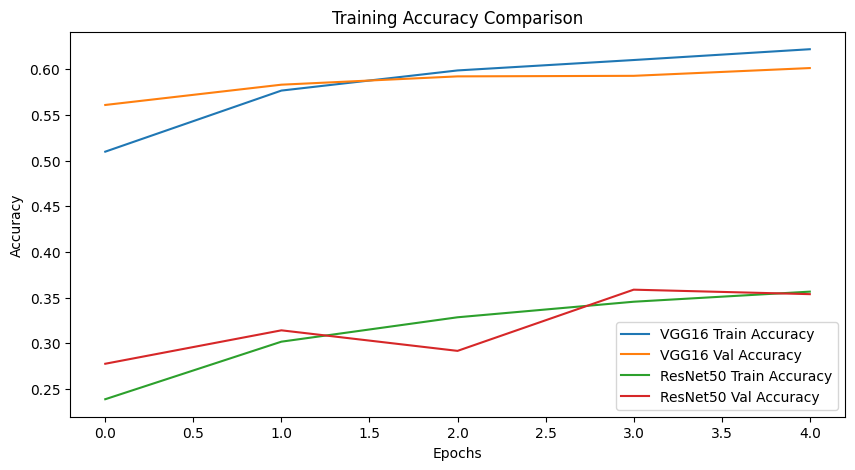

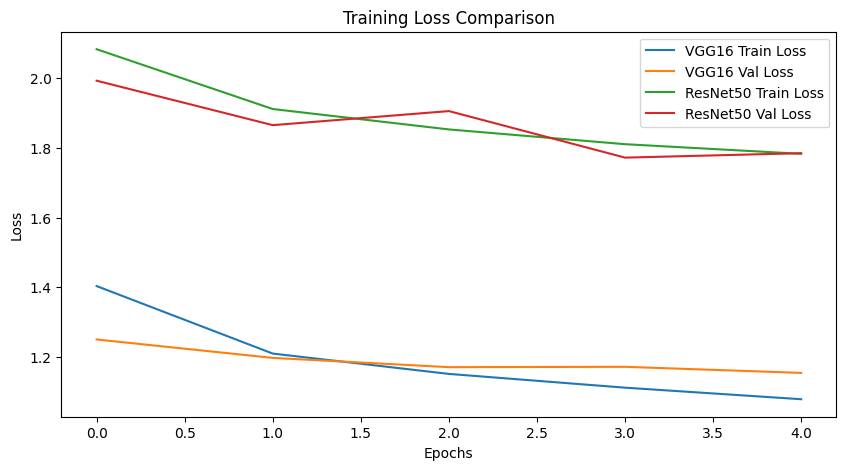

In [7]:
# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Train Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Val Accuracy')
plt.plot(resnet50_history.history['accuracy'], label='ResNet50 Train Accuracy')
plt.plot(resnet50_history.history['val_accuracy'], label='ResNet50 Val Accuracy')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(vgg16_history.history['loss'], label='VGG16 Train Loss')
plt.plot(vgg16_history.history['val_loss'], label='VGG16 Val Loss')
plt.plot(resnet50_history.history['loss'], label='ResNet50 Train Loss')
plt.plot(resnet50_history.history['val_loss'], label='ResNet50 Val Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
